<a href="https://colab.research.google.com/github/sunjorkey/EIT2/blob/main/KNN_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn


##Import data

In [ ]:
data_train= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Week2/ass/MNIST_train.csv")
data_test= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Week2/ass/MNIST_test.csv")

##Prepare data

In [ ]:
Train_np =data_train.to_numpy()  # convert data from Pandas dataframe to NumPy arrays
Test_np =data_test.to_numpy() 

x_train, y_train = Train_np[:, 3:], Train_np[:,2] # extract data from two NumPy arrays, Train_np and Test_np. 
x_test, y_test = Test_np[:, 3:], Test_np[:,2] 


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


##Plot the data

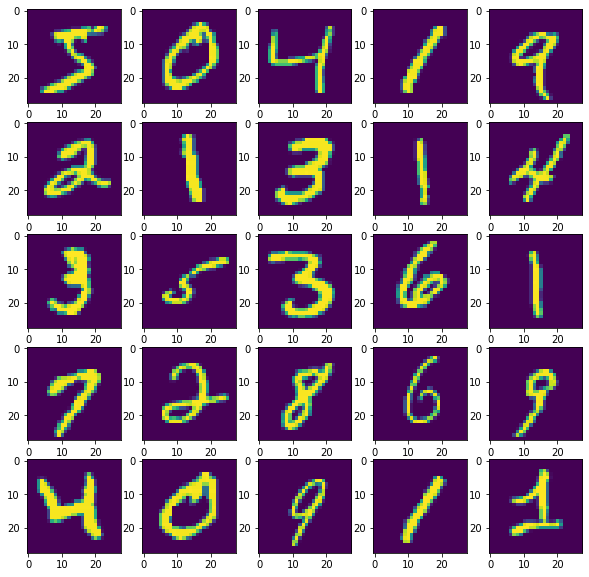

In [ ]:
#display the grid of images.
nfigs = 5  
fig = plt.figure(figsize=(10,10))
for i in range(nfigs ** 2):
    ax = fig.add_subplot (nfigs, nfigs, i+1)
    ax.imshow(x_train[i].reshape(28, 28))

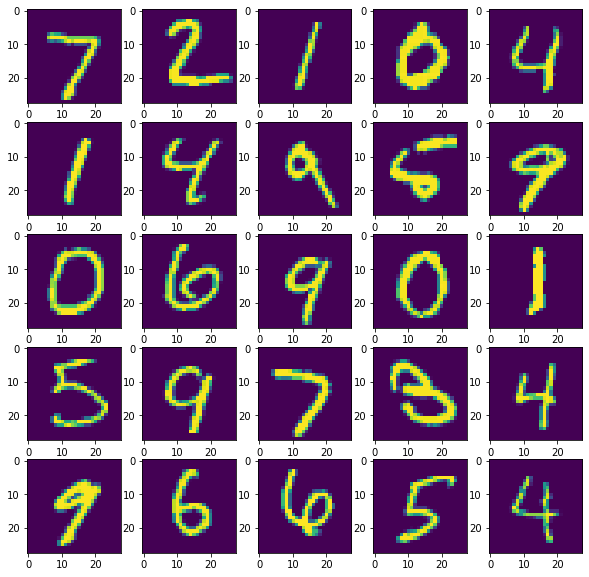

In [ ]:
nfigs = 5
fig = plt.figure(figsize=(10,10))
for i in range(nfigs ** 2):
    ax = fig.add_subplot (nfigs, nfigs, i+1)
    ax.imshow(x_test[i].reshape(28, 28))

##Gauss Bayes 

In [ ]:
# defines a function called accuracy 
def accuracy(y_train, y_train_hat):
  return np.mean(y_train==y_train_hat)

In [ ]:
#Apply class for Gaussian Bayes classification
class GaussBayes():

  def fit(self, X,y, epsilon=1e-3):

    self.likeihoods=dict()
    self.priors=dict()

    self.K =set(y.astype(int))  

    for k in self.K:

      X_k = X[y==k,:]   
      N_k, D=X_k.shape         
      mu_k =X_k.mean(axis=0)
      self.likeihoods[k]= {"mean":X_k.mean(axis=0),"cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)

  def predict(self,X):
    N, D = X.shape
    P_hat = np.zeros((N,len(self.K)))

    for k, l in self.likeihoods.items():
      P_hat[:,k]=mvn.logpdf(X, l["mean"],l["cov"])+np.log(self.priors[k])
    
    return P_hat.argmax(axis=1)

In [ ]:
# train and predict using Gaussian Bayes
gnb = GaussBayes()
gnb.fit(x_train,y_train)
y_train_hat = gnb.predict(x_train)
y_test_hat=gnb.predict(x_test)

In [ ]:
accuracy(y_test,y_test_hat) #return accuracy

0.7532

##KNN Classifier

In [ ]:
#Apply class for KNN classification
class KNNClassifier():
  
  def fit(self,x_train,y_train):
    self.x_train=x_train
    self.y_train=y_train

  def predict(self,x_train,K, epsilon =1e-3):
    N= len(x_train)
    y_train_hat=np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.x_train-x_train[i])**2,axis=1)    
      idxt = np.argsort(dist2)[:K]     
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_train_hat[i]= np.bincount(self.y_train[idxt],weights=gamma_k).argmax()

    return y_train_hat

In [ ]:
#train and predict using KNN
knn=KNNClassifier()
knn.fit(x_train,y_train)
y_train_hat=knn.predict(x_train,5)
y_test_hat=knn.predict(x_test,5)

In [ ]:
accuracy(y_test,y_test_hat) #return accuracy

0.9691